In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline


For this project I used UN homicide data to investigate trends in 
murder rate between 2000 and 2016, and tried to answer a few questions:

1. Is the murder rate increasing or decreasing?
2. How confident can we be in this conclusion?
3. Do different regions show similar or diverging trends?

First I looked at the data in excel. It conatins two separate tables:
1. Total number of homicides per country
2. Number of homicides per 100k population

As an initial visualization, I plotted all homicide rates per 
100k for every country from 2000-2016 to see if there were any obivous 
trends in murder rate.

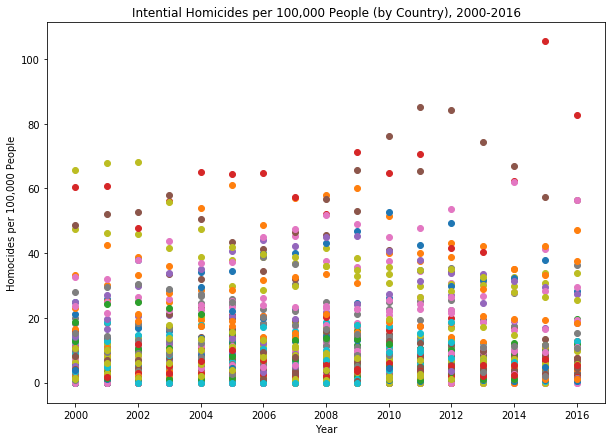

In [3]:
#read data, remove header & footer rows:
df = pd.read_excel('Intentional homicide victims, total counts and rat.xls', sheet_name = "Total Count and Rate", skiprows = 5, skipfooter = 7)

#remove dashes, replace with null
for value in df.values:
    if str(value) == "-":
        value = None

#subset 'homicides per 100k' data
df_per100k = df[['2000.1', '2001.1', '2002.1', 
                '2003.1', '2004.1', '2005.1', 
                '2006.1', '2007.1', '2008.1', 
                '2009.1', '2010.1', '2011.1', 
                '2012.1', '2013.1', '2014.1', 
                '2015.1', '2016.1']].transpose()

#Plot annual homicide rate per 100k for all countries 2000-2016
plt.figure(figsize=(10, 7))
plt.title("Intential Homicides per 100,000 People (by Country), 2000-2016")
plt.ylabel("Homocides per 100,000 People")
plt.xlabel("Year")
for row in df_per100k:
    plt.scatter(np.arange(2000, 2017, 1), df_per100k[row])

Looking at the plot, there are no obvious trends in murder rate. I decided to 
plot the total number of homocides and run a linear regression to quantify
any possible trend. 

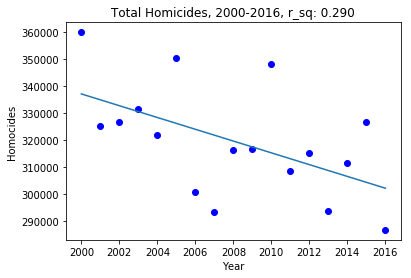

In [5]:
#create subset of total homicides for each year
df_totals = df[[2000, 2001, 2002, 
                2003, 2004, 2005, 
                2006, 2007, 2008, 
                2009, 2010, 2011, 
                2012, 2013, 2014, 
                2015, 2016]].transpose()

#truncate total homicide values (no such thing as "56.203223936 people murdered in Comoros in 2000")
for value in df_totals:
    value = int(value)

#Define Linear regression modeling & plotting function 
def lin_regress(x, y, title, plot_color):
    plt.scatter(x, y, color = plot_color)
    model = LinearRegression().fit(x, y)
    r_sq = model.score(x,y)
    slope = model.coef_
    trendline = model.coef_[0] * x + model.intercept_
    plt.plot(x, trendline)
    plt.title(str(title) + ", r_sq: " + str(r_sq)[:5])
    plt.xlabel("Year")
    plt.ylabel("Homocides")
    
#run linear regression on total homicides    
x = (np.arange(2000, 2017, 1)).reshape(-1,1)
annual_total = df_totals.sum(axis=1)
lin_regress(x, pd.DataFrame(annual_total), "Total Homicides, 2000-2016", 'blue')


The plot shows a slight downward trend in total number of homicides, but an R squared of
0.29 is too weak to make any conclusions. And taking a closer look at the raw data, I 
noticed that some years were missing significant portions of homocide data. This creates 
a selection bias, since years in which data is missing from a certain country would be 
equivalent to '0 homocides,' which is almost certainly not the case. I therefore decided 
to use the mean and median number of homicides, which are more representative aggregates.

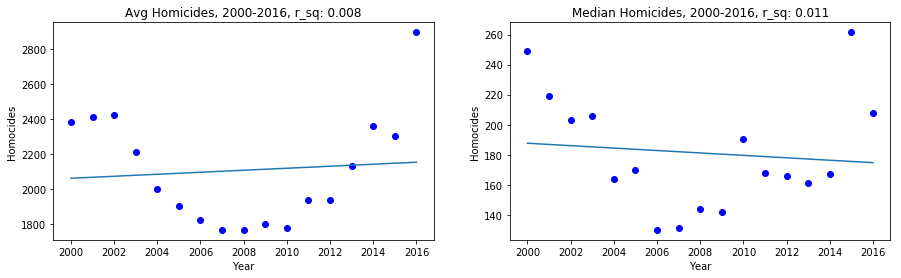

In [6]:
#average homicides per country by year
annual_avg = df_totals.mean(axis=1)
x = (np.arange(2000, 2017, 1)).reshape(-1,1)
y = pd.DataFrame(annual_avg)

plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
lin_regress(x, y, "Avg Homicides, 2000-2016", 'blue')

#median number of homicides per country by year
annual_avg = df_totals.median(axis=1)
y = pd.DataFrame(annual_avg)
plt.subplot(1, 2, 2)
lin_regress(x, y, "Median Homicides, 2000-2016", 'blue')

These show an obviously non-linear pattern, so the trendline and R squared values 
don't tell us much. 

But there is an apparent "U" shape to the data, with the murder
rate decreasing between 2000-2007 and increasing after 2011. I split the data to
measure these trends. 

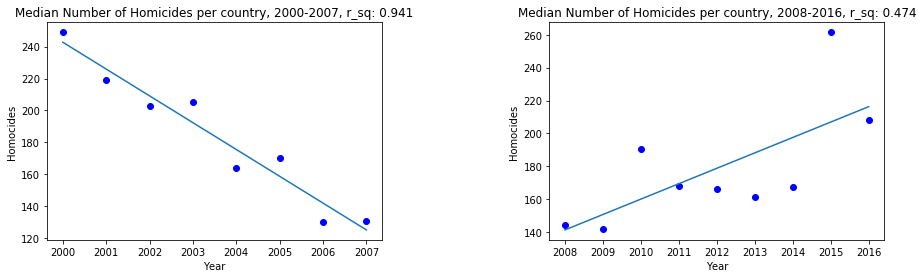

In [15]:
#subset & regress from 2000-2007
df_00_to_07 = df[[2000, 2001, 2002, 
                  2003, 2004, 2005, 
                  2006, 2007]].transpose()

series_00_to_07_avg = df_00_to_07.median(axis=1)

x = (np.arange(2000, 2008, 1)).reshape(-1,1)
y = pd.DataFrame(series_00_to_07_avg)


plt.figure(figsize=(15, 4))
plt.subplots_adjust(wspace = 0.5, hspace = 1)
plt.subplot(1, 2, 1)
lin_regress(x, y, "Median Number of Homicides per country, 2000-2007", 'blue')


#subset & regress from 2008-2016
df_08_to_16 = df[[2008, 2009, 2010, 
                  2011, 2012, 2013, 
                  2014, 2015, 2016]].transpose()

series_08_to_16_avg = df_08_to_16.median(axis=1)
x = (np.arange(2008, 2017, 1)).reshape(-1,1)
y = pd.DataFrame(series_08_to_16_avg)

plt.subplot(1, 2, 2)
lin_regress(x, y, "Median Number of Homicides per country, 2008-2016", 'blue')





2000-2007 show a clear linear trend, but we should be careful about drawing conclusions because 8 years isn't a very large sample size. 

Next, I grouped the data by region-- Africa, Americas, Asia, Europe, and Oceania. Then I plotted the median total number of annual murders of all countries in each region to see if there were any similarities or divergences among them. 
    

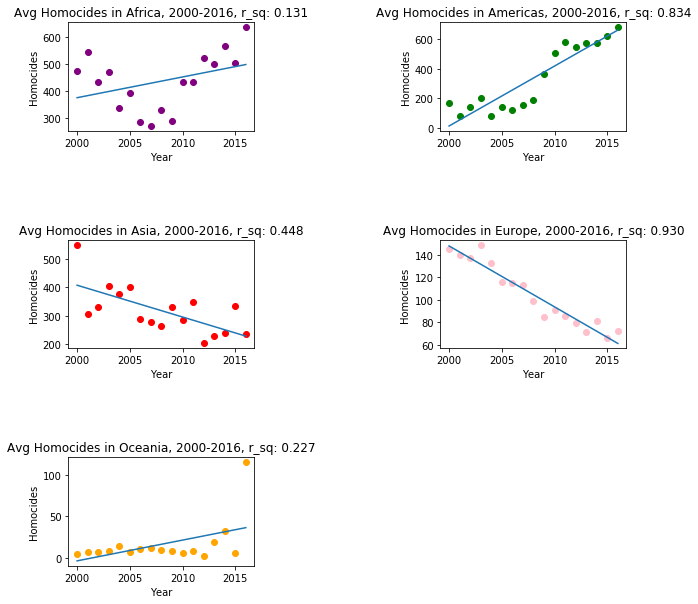

In [16]:
#create DataFrame groubed regional median
df_reg = df[['Region', 2000, 
            2001, 2002, 2003, 
            2004, 2005, 2006, 
            2007, 2008, 2009, 
            2010, 2011, 2012, 
            2013, 2014, 2015, 2016]]

df_reg_avg = df_reg.groupby('Region').median()


#model & plot linear regression for median annual homicide rate for each region
x = (np.arange(2000, 2017, 1)).reshape(-1,1)

plt.figure(figsize=(10, 10))

plt.subplots_adjust(wspace = 1, hspace = 1)
plt.subplot(3, 2, 1)
y = pd.DataFrame(df_reg_avg.loc['Africa'])
lin_regress(x, y, "Avg Homocides in Africa, 2000-2016", 'purple')

plt.subplot(3, 2, 2)
y = pd.DataFrame(df_reg_avg.loc['Americas'])
lin_regress(x, y, "Avg Homocides in Americas, 2000-2016", 'green')

plt.subplot(3, 2, 3)
y = pd.DataFrame(df_reg_avg.loc['Asia'])
lin_regress(x, y, "Avg Homocides in Asia, 2000-2016", 'red')

plt.subplot(3, 2, 4)
y = pd.DataFrame(df_reg_avg.loc['Europe'])
lin_regress(x, y, "Avg Homocides in Europe, 2000-2016", 'pink')

plt.subplot(3, 2, 5)
y = pd.DataFrame(df_reg_avg.loc['Oceania'])
lin_regress(x, y, "Avg Homocides in Oceania, 2000-2016", 'orange')

Africa, Asia, and Oceania don't show any continuous or robust trend from 2000-2016, but Europe and the Americas do. 

In [10]:
print("Americas slope: ", LinearRegression().fit(x, pd.DataFrame(df_reg_avg.loc['Americas'])).coef_)
print("Europe slope: ", LinearRegression().fit(x, pd.DataFrame(df_reg_avg.loc['Europe'])).coef_)

Americas slope:  [[40.32965686]]
Europe slope:  [[-5.41053922]]


So according to my model, The median number of murders per country increased in the Americas by an average 40 every year, and decreased by 5 in Europe. These opposite trends help to account for the U-shaped data we found in the global homocide rate. 

Let's revisit my initial questions:
1. Is the murder rate increasing or decreasing? 
It depends the timeframe, the region you're measuring, and how you aggregate. Globally, the murder rate shows a weak "U"-shaped trend. 

2. How confident can we be in this conclusion? 
Not very. The source data is missing a significant number of values-- more than enough to skew the results. For example, Oceania shows a huge spike homicides in 2016. But a closer look at the raw data reveals that all but two countries are missing murder data from that year: Australia (227 homicides) and American Samoa (3 homicides). Therefore the median for the region is 165, significantly high than other years. 
One possible way to reduce the noise in the incomplete data is to impute the missing values, by interpolating a linear trend between years. Another way to increase confidence in our conclusions is to run our regression models using every single individual data point instead of aggregating globally or by region. 

3. Do different regions show similar or diverging trends?
The regions differed significantly in the direction and robustness of their respective trends. Even within regions, neighboring countries sometimes showed radically opposite trends (e.g. Venezuela's murder rate skyrocketed while Colombia's plummeted). 


